# MEDICAL CLAIM DATA ANALYSIS

## INTRODUCTION



In today's healthcare landscape, cost reduction is a critical objective for health insurance companies striving to provide affordable coverage while maintaining high-quality care. As the demand for healthcare services continues to rise, it becomes increasingly important to identify areas where costs can be minimized without compromising patient outcomes. To address this challenge, we embarked on an in-depth analysis of a historical medical claims dataset provided by a health insurance company. This dataset contains information on individual members, including their diagnoses, procedures performed, medications prescribed, and associated costs for each claim. By leveraging data analytics techniques, the aim is to uncover actionable insights that can help the health insurance company identify opportunities for cost reduction and optimize resource allocation effectively. In this report, I present findings and recommendations based on my analysis of the medical claims data, highlighting key areas where cost-saving measures can be implemented to drive greater efficiency and affordability in healthcare delivery.

### Objectives

The primary objective of this analysis is to discern actionable insights from comprehensive health insurance data, thereby empowering institution to make informed decisions aimed at mitigating expenses without comprimising the quality of coverage.
Specifically, the report seeks to achieve the following objectives:
    
   1. Analyze historical expenditure patterns to discern trends and anomalies.
   2. Identify key drivers of healthcare costs and their respective impacts.
   3. Expose potential areas for optimization and cost containment.
   4. Provide actionable recommendations for expenses reduction based on data-driven insights.

### Scope

 This analysis encompasses a broad spectrum of data sources, including but not limited to claims data, demographic information, provider networks, and medical utilization metrics. 
    By harnessing the power of analysis techniques, the scope of this study extends to the entire continuum of healthcare expenditure.

In summary, this report represents a pivotal step towards a more efficient, equitable, and sustainable healthcare ecosystem in which data-driven decision-making fosters optimal outcomes for both insurers and insured parties.

Most of the time, I used demography claim to give insights.

df = demography claim dataframe
df_1  = claim dataframe
df_2 = demography dataframe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report # for froud
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\HP\Documents\GIS\rssb_medical claims\demography_claim.csv') # loading demography claim csv file in this python notebook

In [4]:
df.head(4) #first 4 rows of the demography claims file

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,Phyllis,Monahan,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932


In [5]:
df.shape #dimensions of demography claim file (rows, columns)

(1937350, 16)

In [6]:
if df.isna().any().any():
    print("The demography claim has empty data.")
else:
    print("The demography claim does not have empty data.")

The demography claim does not have empty data.


Statitical summary of Demography Claim file

In [7]:
df.describe().T #statistical summary of the demography claim csv file

,count,mean,std,min,25%,50%,75%,max
quantity,1937350.0,50.529090,28.862717,1.0,26.00,51.0,76.0,100.0
billedAmount,1937350.0,252618.540323,221338.377582,5.0,69620.00,189280.0,385875.0,1000000.0
verifiedAmount,1937350.0,126286.635662,147184.168518,0.0,20466.00,69984.0,179485.0,987357.0
paidAmount,1937350.0,126331.904661,147161.249009,1.0,20472.25,70021.0,179838.0,985496.0


In [8]:
df_1 = pd.read_csv(r'C:\Users\HP\Documents\GIS\rssb_medical claims\claim.csv') #Loading Claim csv file in this notebook

In [9]:
df_1.head(4) #first 4 rows of the claim file

,id,createdAt,updatedAt,scheme,patientId,medicationCode,admissionDate,dischargeDate,medicationName,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,66dc1204-4659-4a11-9caf-8d73e606f2c8,2024-04-23 00:50:53.250608,2024-04-23 00:50:53.276233,MUTUELLE,ab4dbfa7-9d5d-4341-b3b6-29a4c4b2edf1,32138,2023-10-01 14:30:46.964,2024-03-16 22:54:55.463,HEMORRHOIDECTOMY,ICD-J05AB01003,CPT-42242000FQZ445,75,2625,1716,909
1,71bde428-ef0a-4d42-bff1-473b751fb40e,2024-04-23 00:52:19.464756,2024-04-23 00:52:19.479903,MUTUELLE,5e11bb86-bdf5-460e-96f5-ac1ab31f3bd1,J01MA03001,2024-03-25 20:37:47.191,2024-04-12 20:39:00.497,CIPROFLOXACIN 500MG TABLET,ICD-J05AR01002,CPT-42242000FQZ429,73,521585,222971,298614
2,53ed2514-fad6-4925-abd2-605e272277e7,2024-04-23 00:50:53.317807,2024-04-23 00:50:53.348851,MUTUELLE,d1a7c6dc-cab5-4700-92b7-b406fddbdca4,M01AB05005,2023-08-13 22:05:54.853,2023-12-23 02:15:25.413,DICLOFENAC 75MG/ML INJECTION,ICD-J01XX04001,CPT-42242000FQZ419,100,559500,294490,265010
3,ce6f97e0-7179-4f13-bd59-2e91cbd53442,2024-04-23 00:50:53.377835,2024-04-23 00:50:53.406237,MUTUELLE,f095637f-2192-4a71-aa37-2f3cdbdd3790,A03F01001,2024-03-21 11:19:42.498,2024-04-16 09:17:25.318,METOCLOPRAMIDE 10MG TABLET,ICD-J01XC01001,CPT-42242000FQZ386,86,672520,672469,51


In [10]:
#verify if claim csv file has empty cells
if df_1.isna().any().any():
    print("The claim csv file has empty data.")
else:
    print("The claim df does not have empty data.")

The claim csv file has empty data.


In [10]:
missing_valuess= df_1.isnull()

In [11]:
missing_valuess.sum() # the number of missing values in each column

id                 0
createdAt          0
updatedAt          0
scheme             0
patientId         86
medicationCode     0
admissionDate      0
dischargeDate      0
medicationName     0
diagnosisCode      0
procedureCode      0
quantity           0
billedAmount       0
verifiedAmount     0
paidAmount         0
dtype: int64

In [12]:
missing_valuess.sum().sum()

86

There are 86 missing values in PatientID column in the Claim csv data file

Statical summary of Claim file

In [13]:
df_1.describe().T #statistcal summary of the claim csv file

,count,mean,std,min,25%,50%,75%,max
quantity,1937436.0,50.529179,28.862700,1.0,26.0,51.0,76.0,100.0
billedAmount,1937436.0,252618.366140,221337.220293,5.0,69625.0,189280.0,385875.0,1000000.0
verifiedAmount,1937436.0,126286.598175,147183.428811,0.0,20466.0,69983.5,179486.0,987357.0
paidAmount,1937436.0,126331.767964,147160.117983,1.0,20473.0,70022.0,179839.0,985496.0


We realize that the claim file contains over 1.900.000 elements

Claim file has the same  1937436 elements, an average paid amount of 1263318, a max paid amount of 9854960

In [14]:
df_1.info() #information contained in the Claim file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937436 entries, 0 to 1937435
Data columns (total 15 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   createdAt       object
 2   updatedAt       object
 3   scheme          object
 4   patientId       object
 5   medicationCode  object
 6   admissionDate   object
 7   dischargeDate   object
 8   medicationName  object
 9   diagnosisCode   object
 10  procedureCode   object
 11  quantity        int64 
 12  billedAmount    int64 
 13  verifiedAmount  int64 
 14  paidAmount      int64 
dtypes: int64(4), object(11)
memory usage: 221.7+ MB


In [15]:
df_2= pd.read_csv(r'C:\Users\HP\Documents\GIS\rssb_medical claims\demography.csv')

In [16]:
df_2.head(4) #first 4 rows of the demography file

,id,createdAt,updatedAt,firstName,lastName,gender,yearOfBirth,location,facilityName
0,9b2af029-7584-4229-8710-7335806c1440,2024-04-23 00:50:51.717305,2024-04-23 00:50:51.717305,Carolyn,Fritsch,FEMALE,1973,Lake Newell,Forttown
1,7feb5992-93e6-4b12-bf82-098e10f5291d,2024-04-23 00:50:51.879266,2024-04-23 00:50:51.879266,Fred,Heller,FEMALE,1982,Valerieworth,La Stamal
2,12c23628-57ab-414b-a2d0-15ce6f756db2,2024-04-23 00:50:52.001138,2024-04-23 00:50:52.001138,Ella,Rath,FEMALE,1913,Louton,Grand Mountnell
3,3bb1ebe6-583b-4abd-a764-fe765383814d,2024-04-23 00:50:52.116767,2024-04-23 00:50:52.116767,Erik,Jaskolski,FEMALE,1922,Lessiestad,Prince Statenor


In [17]:
#verify if demography csv file has empty cells
if df_2.isna().any().any():
    print("The demography csv file has empty data.")
else:
    print("The demography df does not have missing data.")

The demography df does not have missing data.


Statistical summary of Demography

In [18]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
yearOfBirth,38747.0,1983.783648,25.537726,1900.0,1965.0,1985.0,2005.0,2024.0


We see that the demography file has 38747 elements where the oldest(max) person was born around 1900 and the youngest during 2024.
The standard deviation is 25.5 years
The average of year being 1983.7

### Froud

In [28]:
# Calculate ratio of paid amount to billed amount
df['paid_to_billed_ratio'] = df['paidAmount'] / df['billedAmount']

In [31]:
print(f'The ration paidAmount/billedAmout is :', df['paid_to_billed_ratio'] )

The ration paidAmount/billedAmout is : 0          0.282008
1          0.106034
2          0.270044
3          0.757197
4          0.646914
             ...   
1937345    0.808148
1937346    0.566765
1937347    0.818129
1937348    0.993063
1937349    0.497343
Name: paid_to_billed_ratio, Length: 1937350, dtype: float64


In [34]:
df['paid_to_billed_ratio'].sort_values() #sorting the ration of paid amount/billed amount

105445     0.000002
353123     0.000005
806207     0.000005
1806915    0.000005
607798     0.000008
             ...   
1381316    1.000000
1499243    1.000000
777924     1.000000
1458312    1.000000
378344     1.000000
Name: paid_to_billed_ratio, Length: 1937350, dtype: float64

INTERPRETATION of RATION

If The highest ration is 1 means that no payments has exceeded billed amount.
   

If The ration is less than one suggests that the amount paid is less than the billed amount.

This could signal challenges with reimbursment rates negotiated with insurers, resulting in underpayment relative to billed charges.
        It may also indicate denials or delays in payment from insurers, leading to lower collections.
    

Ideal ratio:
        Is when the ration is close to 1, indicating the amount paid aligns closely with the initially billed charges.
        This suggests efficient billing practices, accurate coding, effective negociation with insurers, and timely reimbursment, resulting in optimal revenue realization.

In [35]:
from sklearn.ensemble import IsolationForest

# Define features for anomaly detection
features = ['billedAmount', 'paidAmount', 'paid_to_billed_ratio']

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)
df['is_outlier'] = iso_forest.fit_predict(df[features])


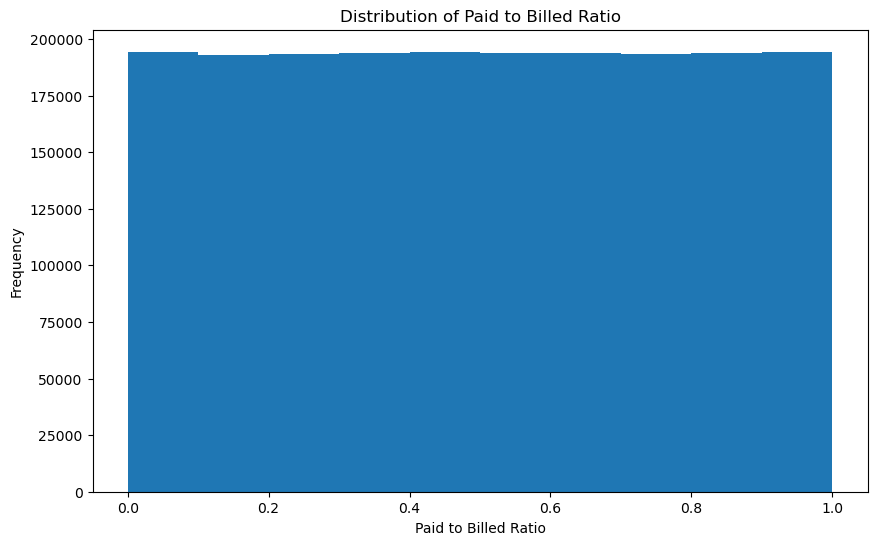

In [37]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize distribution of paid to billed ratio
plt.hist(df['paid_to_billed_ratio'])
plt.xlabel('Paid to Billed Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Paid to Billed Ratio')
plt.show()


INTERPRETATION of the distribution to Non-Technical

You have a bunch of numbers representing how much money a person paid for their medical treatment compared to how much the treatment actually cost. This is called the "paid to billed ratio." The above chart visualizes these numbers using a histogram.

In the histogram, we have the "paid to billed ratio" values on the horizontal axis (like a number line) and the frequency of each value on the vertical axis (like a bar chart). Each bar in the histogram represents how many times a particular "paid to billed ratio" value occurs in our dataset.

So, if you look at the histogram, you'll see a bunch of bars. Each bar shows you how many people have a "paid to billed ratio" within a certain range. For example, if a bar is taller, it means more people have a "paid to billed ratio" in that range.

his helps us see if most people paid close to what they were billed, or if there are some cases where people paid significantly more or less than the billed amount. It's a way to understand the patterns in the data and spot any unusual or unexpected situations.

                        Verification if the RATION DATA are normaly distributed

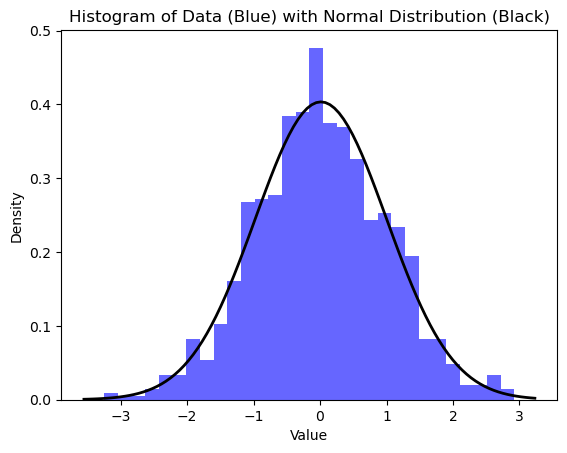

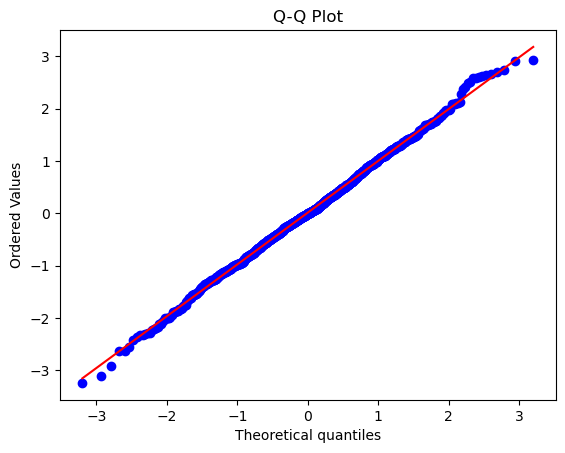

Shapiro-Wilk test p-value: 0.6119540333747864
Data follows a normal distribution


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate example data
df = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram
plt.hist(df, bins=30, density=True, alpha=0.6, color='blue')

# Add a normal distribution curve for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(df), np.std(df))
plt.plot(x, p, 'k', linewidth=2)

# Visual inspection
plt.title('Histogram of Data (Blue) with Normal Distribution (Black)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Q-Q plot
plt.figure()
stats.probplot(df, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test for normality
statistic, p_value = stats.shapiro(df)
print("Shapiro-Wilk test p-value:", p_value)
if p_value < 0.05:
    print("Data does not follow a normal distribution")
else:
    print("Data follows a normal distribution")


SCATTER OF NUMBER OF PEOPLE ADMITTED OVER TIME

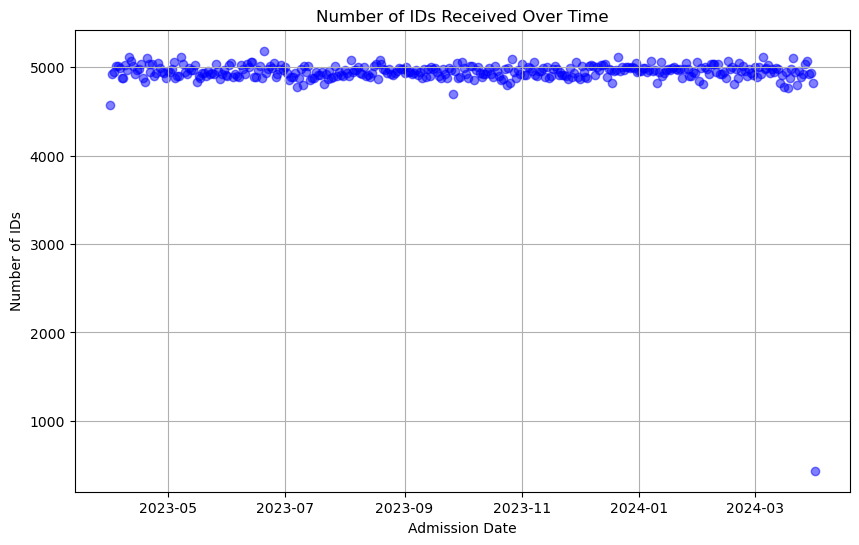

In [19]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with 'admission date' and 'patientid' columns
# For example:
# df = pd.read_csv('your_data.csv')  # Replace this with your actual DataFrame

# Convert 'admission date' column to datetime type
df['new_admissionDate'] = pd.to_datetime(df['new_admissionDate'])

# Group by 'admission date' and count unique 'patientid's for each date
ids_received = df.groupby('new_admissionDate')['id'].nunique()

# Create a scatter plot of 'admission date' vs number of unique 'patientid's
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(ids_received.index, ids_received.values, color='blue', alpha=0.5)  # Plot admission date vs number of IDs
plt.title('Number of IDs Received Over Time')  # Set the title of the plot
plt.xlabel('Admission Date')  # Set the label for the x-axis
plt.ylabel('Number of IDs')  # Set the label for the y-axis
plt.grid(True)  # Enable grid lines
plt.show()  # Display the plot


In [21]:
ids_received.head(3)

new_admissionDate
2023-04-01    4572
2023-04-02    4924
2023-04-03    4940
Name: id, dtype: int64

## AGE

Sort by age

In [20]:
BirthYear =df_2['yearOfBirth']
sorted_BirthYeart= df_2.sort_values(by='yearOfBirth')
sorted_BirthYeart.head(6)

,id,createdAt,updatedAt,firstName,lastName,gender,yearOfBirth,location,facilityName
3991,cb92376e-6f82-4ccd-9e36-2e0618b823f7,2024-04-23 00:52:57.554566,2024-04-23 00:52:57.554566,Dominic,Jenkins,MALE,1900,Morarville,Ritral
2406,5a463ff4-52f9-4b6c-859b-cee37c1e85dc,2024-04-23 00:52:09.00756,2024-04-23 00:52:09.00756,Vincent,Hartmann-Ferry,FEMALE,1900,East Alverabury,Royal Ucold
439,f1d2343a-cc0d-4ce6-91c5-28bf1bf4c31b,2024-04-23 00:51:07.960583,2024-04-23 00:51:07.960583,Lula,Lockman,MALE,1900,Rauborough,North Dsportchil Under Saintehou
1088,7ca21e81-4773-431f-8884-d45cd53c6788,2024-04-23 00:51:28.67236,2024-04-23 00:51:28.67236,Timmy,Paucek,MALE,1900,Topeka,Port Ntutho
1098,2ed9aae1-2615-46f4-87fe-89bd61873eab,2024-04-23 00:51:28.957278,2024-04-23 00:51:28.957278,Geoffrey,Ruecker,MALE,1900,Dahliafort,Chladeda
4544,05b49069-6cc0-4eff-90e3-e85dc788713a,2024-04-23 00:53:15.408237,2024-04-23 00:53:15.408237,Myra,Goodwin,FEMALE,1900,Joanborough,Leania


Age Distribution 

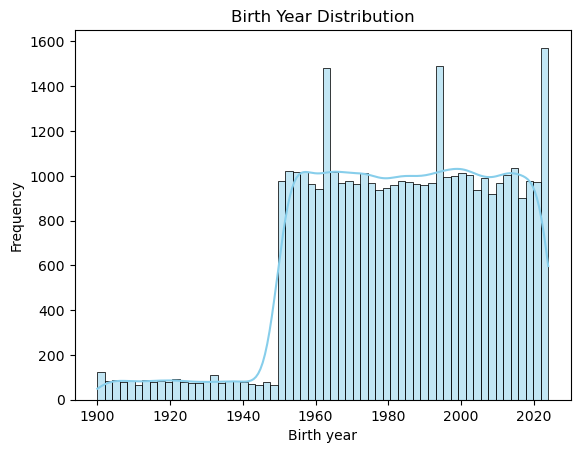

In [21]:
sns.histplot(data=df_2, x='yearOfBirth', bins=60, kde= True, color= 'skyblue')
plt.xlabel('Birth year')
plt.ylabel('Frequency')
plt.title('Birth Year Distribution')
plt.show()

From the above histograpm we see that people born in 60s, 92,93 and babies born during covid are the most consumer of insurence services.
Don't you notice that the datasets has people who were born in 1900 and still show frequencies in medical insurences? either it is true (alive) or not(dead) therefore a fraud in medical insurence. 

### LOCATION

In [22]:
hospitals = df_2['facilityName'].unique() # health facilities(hospitals)
number_= len(hospitals)
print(f'number of hospitals in dataset are {number_}')

number of hospitals in dataset are 100


In [23]:
AmountPer_facility= df.groupby('facilityName')[['paidAmount','billedAmount','verifiedAmount']].sum() # sum amount paid per facility name in demography claim file
print(AmountPer_facility)

               paidAmount  billedAmount  verifiedAmount
facilityName                                           
Anglassron     2709566138    5417175125      2707608987
Bamphills      2448134844    4868185820      2420050976
Battelklouspa  2638862333    5293778955      2654916622
Bea            2352793369    4718510965      2365717596
Bridbelwey     2290261840    4557350990      2267089150
...                   ...           ...             ...
West Dipert    2662282847    5291313185      2629030338
West Rayswade  2687939063    5357816035      2669876972
Whiteyarm      2419074253    4872410295      2453336042
Wnaskas        2347211130    4660405970      2313194840
Wya Point      2382438819    4798574355      2416135536

[100 rows x 3 columns]


In [24]:
HighExpenses = AmountPer_facility[AmountPer_facility['paidAmount']>126331] # facilities with billed amount above average

In [25]:
HighExpenses.head(5)

,paidAmount,billedAmount,verifiedAmount
facilityName,,,
Anglassron,2709566138,5417175125,2707608987
Bamphills,2448134844,4868185820,2420050976
Battelklouspa,2638862333,5293778955,2654916622
Bea,2352793369,4718510965,2365717596
Bridbelwey,2290261840,4557350990,2267089150


In [134]:
sortedBilled = df.sort_values(by='billedAmount', ascending=False) # sorting billed amount in the demography claim file
print(sortedBilled)

                                           id   firstName  lastName  gender  \
224079   ed5c17d0-f865-48ce-a74a-3d183895c924     Jeffery     Lynch  FEMALE   
226532   418a52ca-051d-40d6-ab24-ca5b734bc450     Spencer    Hansen    MALE   
302259   a9b65ef8-8349-42bc-9c88-99a721940f4f         Amy   Goldner  FEMALE   
1085471  cf389477-bafc-45ae-9b90-c46e7ada6e80      Gerald   Schuppe    MALE   
178981   0df6e810-1280-4602-8204-8eacf2de1100  Jacqueline      West  FEMALE   
...                                       ...         ...       ...     ...   
928831   7174686b-0ed9-4d63-91a0-dfd7c5accb4b         Jan      Huel  FEMALE   
1395405  cdb75cc0-4559-4d30-89a1-52827f50cf45      Luther  Cummings    MALE   
1655605  fb5767fc-251e-4ece-8f02-bdc6be854e52       Brett     Price  FEMALE   
1115960  5f9effa8-0966-4f3c-baee-eed90d98a37e       Ervin      Rath  FEMALE   
1261836  303e8c1e-5d02-4956-8fa8-3a09c4041c7f        Dave   Abshire    MALE   

                      facilityName    scheme  medic

In [135]:
sortedBilled.head(4) # top four of the highest billed amount

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
224079,ed5c17d0-f865-48ce-a74a-3d183895c924,Jeffery,Lynch,FEMALE,Brixnessrna,RAMA,30023-5,DEBRIDEMENT AND SKIN GRAFT (>2% BUT <5% BSA) ...,2023-04-21 00:37:20.837,2023-05-17 16:50:22.355,ICD-J04BA01001,CPT-42242000FQZ402,100,1000000,558602,441398
226532,418a52ca-051d-40d6-ab24-ca5b734bc450,Spencer,Hansen,MALE,Saint Tawbol Upon Tannlox,RAMA,20730,INITIATION & MANAGEMENT OF ANAESTHESIA FOR UP...,2024-03-08 19:57:36.96,2024-04-11 18:08:51.259,ICD-J06BB04001,CPT-42242000FQZ392,100,1000000,722931,277069
302259,a9b65ef8-8349-42bc-9c88-99a721940f4f,Amy,Goldner,FEMALE,Daubar,RAMA,D01AC20005,CLOTRIMAZOLE + BETAMETHASONE + GENTAMYCIN OIN...,2024-01-08 10:56:41.156,2024-03-02 22:31:23.033,ICD-J02AB02001,CPT-42242000FQZ400,100,1000000,577934,422066
1085471,cf389477-bafc-45ae-9b90-c46e7ada6e80,Gerald,Schuppe,MALE,Stonemiddswafsea,MUTUELLE,32012,LARGE INTESTINE RESECTION (TOTAL COLECTOMY AN...,2024-02-10 23:58:15.208,2024-03-22 06:21:16.974,ICD-J04AM02002,CPT-42242000FQZ386,100,1000000,198101,801899


### Dates

Extracting dates in format yyy-mm-dd from admissionDate and dischargeDate fields(columns) and form a new columns named new_admissionDate and new_dischargeDate

In [11]:
df['new_admissionDate']= df['admissionDate'].str[:11] #first 11 characters of values of admissionDate
df['new_dischargeDate']= df['dischargeDate'].str[:11] #first 11 characters of values of dischargeDate

In [12]:
df.head(3)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,new_admissionDate,new_dischargeDate
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291,2024-02-12,2024-03-23
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634,2023-11-10,2024-02-20
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269,2023-07-16,2024-03-30


In [13]:
#Convert the date columns to datetime objects
df['new_admissionDate']= pd.to_datetime(df['new_admissionDate'])
df['new_dischargeDate']= pd.to_datetime(df['new_dischargeDate'])

#Calculate the difference between the dates

df['Datedifference'] = df['new_dischargeDate']- df['new_admissionDate']

In [14]:
df.head(3) #display top three of new demography claim dataset

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount,new_admissionDate,new_dischargeDate,Datedifference
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291,2024-02-12,2024-03-23,40 days
1,51b5e30c-cf7c-463b-874c-35b935257049,Dorothy,Rice,MALE,Forttown,MUTUELLE,30631,HYDROCELECTOMY,2023-11-10 07:00:17.013,2024-02-20 01:02:53.296,ICD-J04AB02002,CPT-42242000FQZ400,60,590700,528066,62634,2023-11-10,2024-02-20,102 days
2,5819dcde-d9a9-4bba-9ce5-6eb92c0b9194,Brandy,Pollich,FEMALE,Port Birmills,RAMA,35641,OVARIECTOMIE,2023-07-16 00:22:32.556,2024-03-30 05:26:46.263,ICD-J04AM02002,CPT-42242000FQZ351,34,100980,73711,27269,2023-07-16,2024-03-30,258 days


Days spent in health facilities per scheme

In [11]:
days_df = df.groupby('scheme')['Datedifference'].max()
# the max of days spent for each scheme
days_df 

scheme
MUTUELLE   387 days
RAMA       387 days
Name: Datedifference, dtype: timedelta64[ns]

Facilities with medicationName which takes more time in admission

In [16]:
daysi_df = df.groupby('facilityName')['id'].count() #number of patiences admitted per facilty name

In [17]:
daysi_df.head(3) #visualize only three of them

facilityName
Anglassron       21450
Bamphills        19050
Battelklouspa    21200
Name: id, dtype: int64

In [181]:
Days_facility.head(3)

,paidAmount,billedAmount,verifiedAmount,Datedifference
facilityName,,,,
Anglassron,2709566138,5417175125,2707608987,67085 days 04:14:22.904483840
Bamphills,2448134844,4868185820,2420050976,22782 days 03:48:56.614035456
Battelklouspa,2638862333,5293778955,2654916622,51821 days 04:14:22.904483840


## SCHEMES

In [18]:
# Create new DataFrame based on a condition
RAMA_insur_demogr = df[df['scheme'] == 'RAMA'] # number of people using RAMA in demography claims
MUTUELLE_insur_demogr = df[df['scheme'] == 'MUTUELLE'] # number of people using MUTUELLE in demography claims

RAMA_insur_claims = df_1[df_1['scheme'] == 'RAMA'] # number of people using RAMA in claims file
MUTUELLE_insur_claims = df_1[df_1['scheme'] == 'MUTUELLE'] #number of people using MUTUELLE in claims file

# Displaying the newly created DataFrame
RAMA_insur_demogr.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,968311.0,50.508517,1.0,25.0,51.0,76.0,100.0,28.871529
billedAmount,968311.0,252293.863253,5.0,69300.0,188760.0,385320.0,1000000.0,221300.450912
verifiedAmount,968311.0,125960.061934,0.0,20398.0,69700.0,179055.0,987357.0,146891.355368
paidAmount,968311.0,126333.801319,1.0,20420.0,69953.0,179838.5,985496.0,147301.982984
new_admissionDate,968311,2023-09-30 14:48:03.469464832,2023-04-01 00:00:00,2023-07-01 00:00:00,2023-10-01 00:00:00,2023-12-31 00:00:00,2024-04-01 00:00:00,NaN
new_dischargeDate,968311,2024-01-11 00:57:07.140247552,2023-04-02 00:00:00,2023-11-21 00:00:00,2024-02-03 00:00:00,2024-03-21 00:00:00,2024-04-23 00:00:00,NaN
Datedifference,968311,102 days 10:09:03.670783459,0 days 00:00:00,33 days 00:00:00,79 days 00:00:00,154 days 00:00:00,387 days 00:00:00,84 days 23:35:22.455303270


Now lets evaluate the number of people using each type of scheme (RAMA or MUTUELLE) in each and every csv file

In [18]:
RAMA = len(RAMA_insur_demogr) # number of people using RAMA in demography claims
MUTUELLE = MUTUELLE_insur_demogr.shape[0] # number of people using MUTUELLE in demography claims

RAMA_1 =RAMA_insur_claims.shape[0]
MUTUELLE_1=len(MUTUELLE_insur_claims)

print("number of people using RAMA in demography claims file is: ", RAMA)
print("number of people using MUTUELLE in demography claims file is: ", MUTUELLE)

print("number of people using RAMA in claims file is: ", RAMA_1)
print("number of people using MUTUELLE in claims file is: ", MUTUELLE_1)

number of people using RAMA in demography claims file is:  968311
number of people using MUTUELLE in demography claims file is:  969039
number of people using RAMA in claims file is:  968357
number of people using MUTUELLE in claims file is:  969079


Now let's make totals to see people using RAMA and MUTUELLE separately

In [19]:
RAMAA = RAMA + RAMA_1 #adding number of people using RAMA in both files
MUTUELLEE = MUTUELLE + MUTUELLE_1
diff = MUTUELLEE -RAMAA

print("Total number of people using RAMA scheme is: ", RAMAA)
print("Total number of people using MUTUELLE scheme is: ", MUTUELLEE)
print(f"MUTUELLE users are {diff} more than RAMA users")

Total number of people using RAMA scheme is:  1936668
Total number of people using MUTUELLE scheme is:  1938118
MUTUELLE users are 1450 more than RAMA users


Now, lets investigate if there are 'id' that appear in both df(demographic claim) and df_1(claim)

In [20]:
common_ids= set(df['id']).intersection(df_1['id'])
numb= len(common_ids)
print(f'There are {numb} ids in common. This means we can combine them')

There are 0 ids in common. This means we can combine them


## MEDICATION NAMES

Listing all medicationNames in demography claim

In [20]:
df['medicationName'].unique() # list of all medication names in demograph claim

array([' OVARIECTOMIE', ' HYDROCELECTOMY', ' RADICAL HYSTERECTOMY',
       ' SALPINGECTOMY',
       ' ELBOW, TREATMENT OF DISLOCATION OF, BY CLOSED REDUCTION',
       ' LARGE INTESTINE RESECTION (TOTAL COLECTOMY AND ILEORECTAL ANASTOMOSIS)',
       ' EPIGASTRIC HERNIA REPAIR (EXCLUDING RECURRENT INGUINAL OR FEMORAL HERNIA)',
       ' NEEDLES DISP ASIK 21G GREEN', ' CYTOTEC 200 ΜG TABLET',
       ' SPINA BIFIDA OCCULTA REPAIR', ' HEMORRHOIDECTOMY',
       ' INITIATION & MANAGEMENT OF ANAESTHESIA FOR PERINEUM-FOR VAGINAL PROCEDURES IN THE MANAGEMENT OF POST PARTUM HAEMORRHAGE [BLOOD LOSS > 500MLS] [7 BASIC UNITS]',
       ' TIMOLOL 0.5% EYE DROPS  5ML', ' HEALING ABUTMENT', ' MYOMECTOMY',
       ' ADENOSINE 3MG /ML INJECTION 2ML',
       ' GLIMEPIRIDE 3MG TABLET   B/30', ' SCROTUM EXCISION',
       ' DICLOFENAC 75MG/ML INJECTION',
       ' DRAINAGE OF PLEURAL CAVITY NEC, PNEUMOTHORAX DRAINAGE WITH NEEDLE',
       ' PULP CAPPING INDIRECT',
       ' ERYTHROMYCIN 125MG/5ML POWDER FOR ORAL S

In [22]:
len(df['medicationName'].unique()) #number of medication name in demographic name

100

In [132]:
medicationCost_df = df.groupby('medicationName')['paidAmount'].max()
# the max of paid amount for each medicationName
medicationCost_df 

medicationName
 ABCES, DEEP CYST DRAINAGE AND OR CYST REMOVAL                              919821
 ADENOSINE 3MG /ML INJECTION 2ML                                            905166
 ADHESIVE TAPE 5 CM                                                         958537
 ANAL FISTULA EXCISION                                                      952436
 APPENDECTOMY UNDER 10 YEARS OF AGE                                         918035
                                                                             ...  
 TOTAL ABDOMINAL HYSTERECTOMY-WITH OR WITHOUT REMOVAL OF UTERINE ADNEXAE    937314
 VENTRICULAR PERITONIUM SHUNT INSERTION                                     947474
 VICRYL 1 TAPERPOINT 75CM 31MM 1/2C                                         938579
 VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION                               974272
 X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT]                           945807
Name: paidAmount, Length: 100, dtype: int64

In [24]:
df_1['medicationName'].unique() #list of medicationName in claim file 

array([' HEMORRHOIDECTOMY', ' CIPROFLOXACIN 500MG TABLET',
       ' DICLOFENAC 75MG/ML INJECTION', ' METOCLOPRAMIDE 10MG TABLET',
       ' SCROTUM EXCISION', ' SPLENECTOMY', ' RADICAL HYSTERECTOMY',
       ' X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT]',
       ' GAUZE BANDAGE 7,5CM X 4.5M',
       ' CAUTERIZATION OF EXTENSIVE VULVAR CONDYLOMA (1 ANATOMICAL SITE)',
       ' HYDROCELECTOMY', ' VENTRICULAR PERITONIUM SHUNT INSERTION',
       ' CYSTECTOMY RADICAL',
       ' ELBOW, TREATMENT OF DISLOCATION OF, BY CLOSED REDUCTION',
       ' THYROIDECTOMY', ' MYOMECTOMY',
       ' LAPAROSCOPY DIAGNOSTIC/WITH BIOPSY',
       ' ADENOSINE 3MG /ML INJECTION 2ML',
       ' FASCIOTOMY (MUSCLE, EXCISION OF [EXTENSIVE])', ' OVARIECTOMIE',
       ' SALPINGECTOMY',
       ' LARGE INTESTINE RESECTION (TOTAL COLECTOMY AND ILEORECTAL ANASTOMOSIS)',
       ' EPIGASTRIC HERNIA REPAIR (EXCLUDING RECURRENT INGUINAL OR FEMORAL HERNIA)',
       ' NEEDLES DISP ASIK 21G GREEN', ' CYTOTEC 200 ΜG TABLET',
   

MedicalNames from both demography claim and claim are similar.

In [25]:
len(df_1['medicationName'].unique()) #number of medication name in claim file

100

In [27]:
medicationCost_df_1 = df.groupby('medicationName')['paidAmount'].max()
# the total sum of paid amount for each medicationName in claim file
medicationCost_df_1 

medicationName
 ABCES, DEEP CYST DRAINAGE AND OR CYST REMOVAL                              919821
 ADENOSINE 3MG /ML INJECTION 2ML                                            905166
 ADHESIVE TAPE 5 CM                                                         958537
 ANAL FISTULA EXCISION                                                      952436
 APPENDECTOMY UNDER 10 YEARS OF AGE                                         918035
                                                                             ...  
 TOTAL ABDOMINAL HYSTERECTOMY-WITH OR WITHOUT REMOVAL OF UTERINE ADNEXAE    937314
 VENTRICULAR PERITONIUM SHUNT INSERTION                                     947474
 VICRYL 1 TAPERPOINT 75CM 31MM 1/2C                                         938579
 VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION                               974272
 X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT]                           945807
Name: paidAmount, Length: 100, dtype: int64

Let's see medicationName that are above the mean(average) cost in demograph claim.

In [28]:
Expensive_demogrClaim = df[df['paidAmount']>126331] #Paid amount which are above average
Expensive_demogrClaim.head(4)

,id,firstName,lastName,gender,facilityName,scheme,medicationCode,medicationName,admissionDate,dischargeDate,diagnosisCode,procedureCode,quantity,billedAmount,verifiedAmount,paidAmount
0,f70c7cea-d533-48ff-999e-d8ae2dfbdb7d,Alberta,Gerhold,FEMALE,Nkridgegridgewood,RAMA,35641,OVARIECTOMIE,2024-02-12 04:56:20.699,2024-03-23 09:19:21.894,ICD-J05AE10001,CPT-42242000FQZ425,82,632220,453929,178291
3,026ec986-620b-41e5-9fc2-f9dc4d2247d2,Phyllis,Monahan,FEMALE,North Lusland With Bathdsor,RAMA,35641,OVARIECTOMIE,2023-05-21 00:24:43.016,2023-05-27 06:00:36.737,ICD-J01XB02001,CPT-42242000FQZ410,31,199330,48398,150932
4,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35641,OVARIECTOMIE,2023-04-12 22:32:48.769,2023-09-09 15:52:50.782,ICD-J07BC01002,CPT-42242000FQZ359,100,888500,313717,574783
6,17469904-7dd7-466d-9090-eba19a6f31dc,Daisy,Kuhic,FEMALE,Cetersrye,RAMA,35729,RADICAL HYSTERECTOMY,2023-05-15 22:14:50.465,2024-01-24 16:46:25.606,ICD-J02AC01004,CPT-42242000FQZ423,67,661290,299710,361580


Surgeries are the most expensive medicalName like ovariectomie, radical hysterectomy,...

In [29]:
title_medicationName = df.groupby('medicationName')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘medicationName’
print(title_medicationName)

                                                    quantity  paidAmount  \
medicationName                                                             
 ABCES, DEEP CYST DRAINAGE AND OR CYST REMOVAL        961909  2421279535   
 ADENOSINE 3MG /ML INJECTION 2ML                      981945  2426399371   
 ADHESIVE TAPE 5 CM                                   997633  2496421429   
 ANAL FISTULA EXCISION                                968864  2435706195   
 APPENDECTOMY UNDER 10 YEARS OF AGE                   981622  2444828030   
...                                                      ...         ...   
 TOTAL ABDOMINAL HYSTERECTOMY-WITH OR WITHOUT R...    978109  2442696146   
 VENTRICULAR PERITONIUM SHUNT INSERTION               970050  2448251587   
 VICRYL 1 TAPERPOINT 75CM 31MM 1/2C                   970348  2444749139   
 VITAMIN B 1 100MG/2ML SOLUTION FOR INJECTION         985544  2489016567   
 X-RAY OF THE LUMBAR SPINE OBLIQUE [RIGHT & LEFT]     967883  2384406337   

           

In [72]:
#perform regressin analysis
regression_model = LinearRegression()
regression_model.fit(x.values.reshape(-1,1), y)
slope = regression_model.coef_[0]
intercept = regression_model.intercept_

print(f"Regression Equation: y={slope:.2f}x + {intercept: .2f}")

Regression Equation: y=2473.78x + -2797.26


* The coefficient of x is positive, therefore the correlation is positive.
* The y- intercept (-2797.26) provides the baseline value of y when the independant variable x is zero. To mean that if quantity is zero there is no paid amount.


## AMOUNT PER SCHEME

The following is a figure showing paid amount per scheme

In [31]:
title_scheme = df.groupby('scheme')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘scheme’
print(title_scheme) #demography claim only

          quantity    paidAmount  billedAmount  verifiedAmount
scheme                                                        
MUTUELLE  48984580  122418706006  245111606075    122692900069
RAMA      48907953  122330409489  244298923020    121968513531


In [32]:
title_scheme_claim = df_1.groupby('scheme')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘scheme’
print(title_scheme_claim) # claim only

          quantity    paidAmount  billedAmount  verifiedAmount
scheme                                                        
MUTUELLE  48986378  122423709359  245121439220    122697729861
RAMA      48910673  122336005839  244310477600    121974471761


Combine both demograph claim and claim scheme figures

In [33]:
Both = title_scheme_claim + title_scheme
print(Both)

          quantity    paidAmount  billedAmount  verifiedAmount
scheme                                                        
MUTUELLE  97970958  244842415365  490233045295    245390629930
RAMA      97818626  244666415328  488609400620    243942985292


In [34]:
bills = title_scheme_claim.paidAmount.sort_values() #sort the rest of the data and store it under the variable bill
schemee= title_scheme_claim.paidAmount.sort_values().index #sort the indices and store them under the variable SCHEME

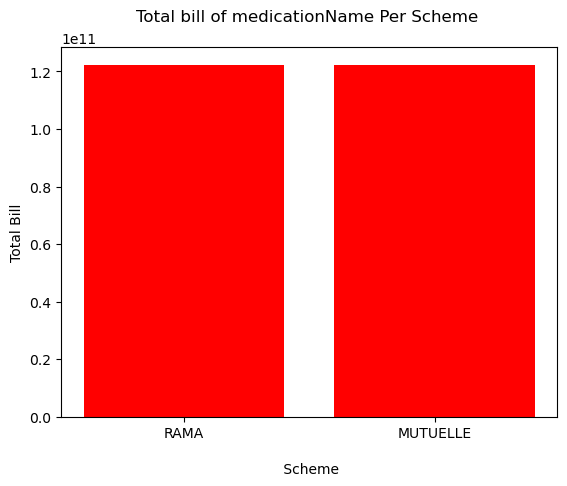

In [35]:
plt.bar(schemee, bills, color= 'red')

# Set x and y-axis titles.
plt.ylabel('Total Bill')
plt.xlabel('\n Scheme')   

# Set graph title.
plt.title('Total bill of medicationName Per Scheme \n')

# Show graph.
plt.show()

From this result, we realize that MUTUELLE has the higher paid amount that RAMA and as the figure of nomber of people using MUTUELLE is higher than RAMA's figure as the earlier cell shows.

Which gender consumes insurence services the most in demography claim

In [36]:
title_gender_demo = df.groupby('gender')[['quantity','paidAmount','billedAmount','verifiedAmount']].sum() #group and sum the data by the number of values for each ‘gender’
print(title_gender_demo) # demography claim only

        quantity    paidAmount  billedAmount  verifiedAmount
gender                                                      
FEMALE  49100033  122843820228  245488868930    122645048702
MALE    48792500  121905295267  243921660165    122016364898


In [37]:
bill = title_gender_demo.paidAmount.sort_values() #sort the rest of the data and store it under the variable bill
gender_dem = title_gender_demo.paidAmount.sort_values().index #sort the indices and store them under the variable week_day


Billed amount per Gender

In [38]:
print(bill)

gender
MALE      121905295267
FEMALE    122843820228
Name: paidAmount, dtype: int64


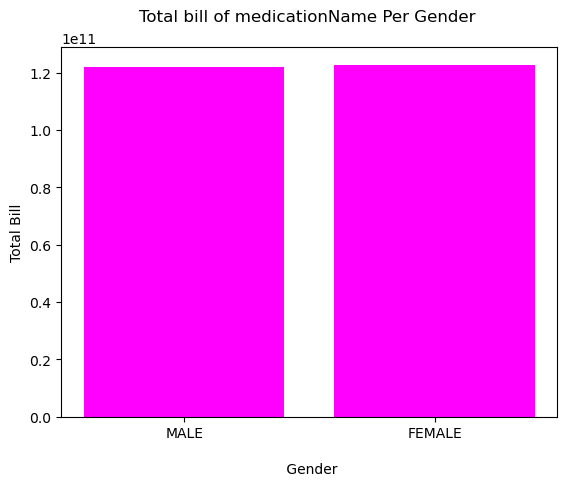

In [39]:
# Plot total bill (y-axis) per day of the week (x-axis). 
# We only have to call a single line of code from matplotlib to produce the base graph. 
# We set the x-axis, y-axis, and the colour of the bars.
plt.bar(gender_dem, bill, color= 'magenta')

# Set x and y-axis titles.
plt.ylabel('Total Bill')
plt.xlabel('\n Gender') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title.
plt.title('Total bill of medicationName Per Gender \n')

# Show graph.
plt.show()

## GENERAL ADVICES

According to Chatgpt; Identifying areas for cost reduction within the member population for a health insurance company involves targeting specific areas where costs can be minimized while maintaining or improving the quality of care. Here are some potential areas for cost reduction:


1.  Preventive Care and Wellness Programs: Investing in preventive care and wellness programs can help reduce the occurrence of costly medical conditions by promoting healthier lifestyles and early detection of health issues.

2. Chronic Disease Management: Implementing disease management programs for common chronic conditions such as diabetes, hypertension, and asthma can help control costs by reducing hospitalizations and complications through proactive management and education.

3. Provider Network Optimization: Negotiating contracts with healthcare providers to lower reimbursement rates or implementing narrower provider networks can help reduce costs while maintaining quality of care.

4. Utilization Management: Implementing utilization management strategies such as prior authorization, step therapy, and formulary management can help ensure appropriate and cost-effective use of healthcare services and medications.

5. Telemedicine and Remote Monitoring: Embracing telemedicine and remote monitoring technologies can reduce costs associated with unnecessary office visits, emergency room visits, and hospitalizations by providing convenient and efficient access to healthcare services.

6. Care Coordination and Case Management: Enhancing care coordination and case management efforts can help avoid duplicate tests, prevent unnecessary procedures, and streamline care transitions, leading to cost savings and improved patient outcomes.

7. Generic Medication Promotion: Encouraging the use of generic medications over brand-name drugs through formulary design and patient education can significantly reduce prescription drug costs for both the insurer and the member.

8. Member Education and Engagement: Providing members with education and tools to make informed healthcare decisions, such as choosing lower-cost providers and understanding their insurance benefits, can empower them to manage their healthcare costs more effectively.

9. Healthcare Fraud Detection and Prevention: Implementing robust fraud detection and prevention measures can help identify and eliminate fraudulent claims, thereby reducing unnecessary costs and protecting the integrity of the insurance system.

10. Data Analytics and Predictive Modeling: Leveraging advanced data analytics and predictive modeling techniques can identify patterns and trends in healthcare utilization and costs, enabling proactive interventions to mitigate risks and reduce costs.

#### THANK YOU